### Bollinger Bands - Perform technical analysis in Python on the 2022 values stock you have selected. Create the Bollinger Bands for the stock.

In [1]:
#importing all the libraries 
import matplotlib.pyplot as plt
import ta
import numpy as np
import pandas as pd
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yf
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt
from prophet import Prophet
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
plt.style.use("seaborn")

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Cognizant Stock for last 5 years'}, xlabel='Date'>

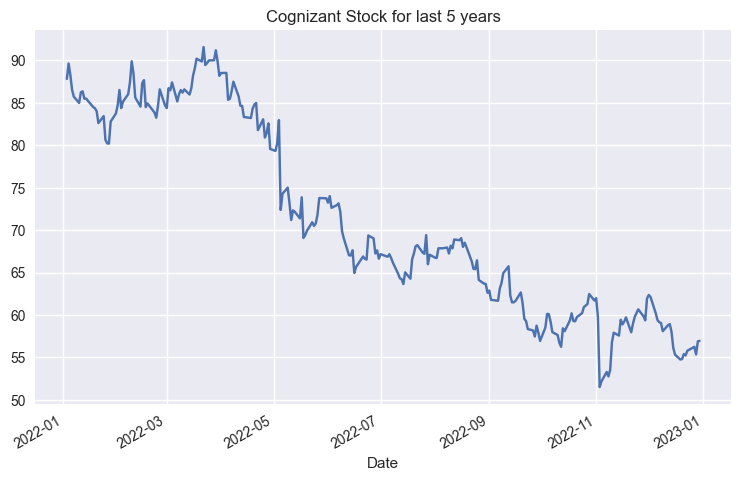

In [2]:
df = yf.download("CTSH",start="2022-01-01", end = "2022-12-31")
df["Adj Close"].plot(title ="Cognizant Stock for last 5 years")

<AxesSubplot:title={'center':'Bollinger bands (ta)'}, xlabel='Date'>

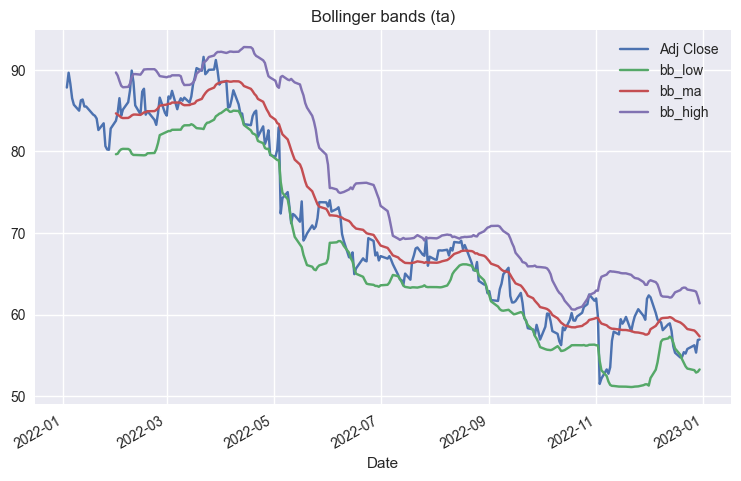

In [3]:
ta_bbands = ta.volatility.BollingerBands(close =df["Adj Close"], window =20,window_dev=2)
ta_df = df.copy()
#ts_df["Adj Close"] = df["Adj Close"]
ta_df["bb_ma"]=ta_bbands.bollinger_mavg()
ta_df["bb_high"]=ta_bbands.bollinger_hband()
ta_df["bb_low"]=ta_bbands.bollinger_lband()

ta_df[["Adj Close","bb_low","bb_ma","bb_high"]].plot(title ="Bollinger bands (ta)")

The main analysis that Bollinger Bands provide for a stock is to identify potential overbought or oversold conditions. When the price of a stock moves above the upper band, it is considered overbought, and when it moves below the lower band, it is considered oversold. Traders and investors may use this information to help identify potential trading opportunities, such as selling when the price reaches the upper band and buying when it reaches the lower band.

Additionally, Bollinger Bands can help traders and investors identify potential trend reversals. If the price of a stock is trending up, and it touches or breaks below the lower band, this may signal a potential trend reversal. Conversely, if the price is trending down, and it touches or breaks above the upper band, this may signal a potential trend reversal.

### Identify the buy and sell signals for the stock from January 1, 2022 through December 31, 2022, using Simple Moving Average and Exponential Moving Average techniques. For both cases, use 30 days for the short-term moving average and 90 days for the long-term moving average.

In [4]:
myticker = 'CTSH'
mydata = pd.DataFrame()
mydata[myticker] = yf.download(myticker, start = "2022-01-01", end="2022-12-31")['Adj Close']
mydata.columns = {'Close Price'}

[*********************100%***********************]  1 of 1 completed


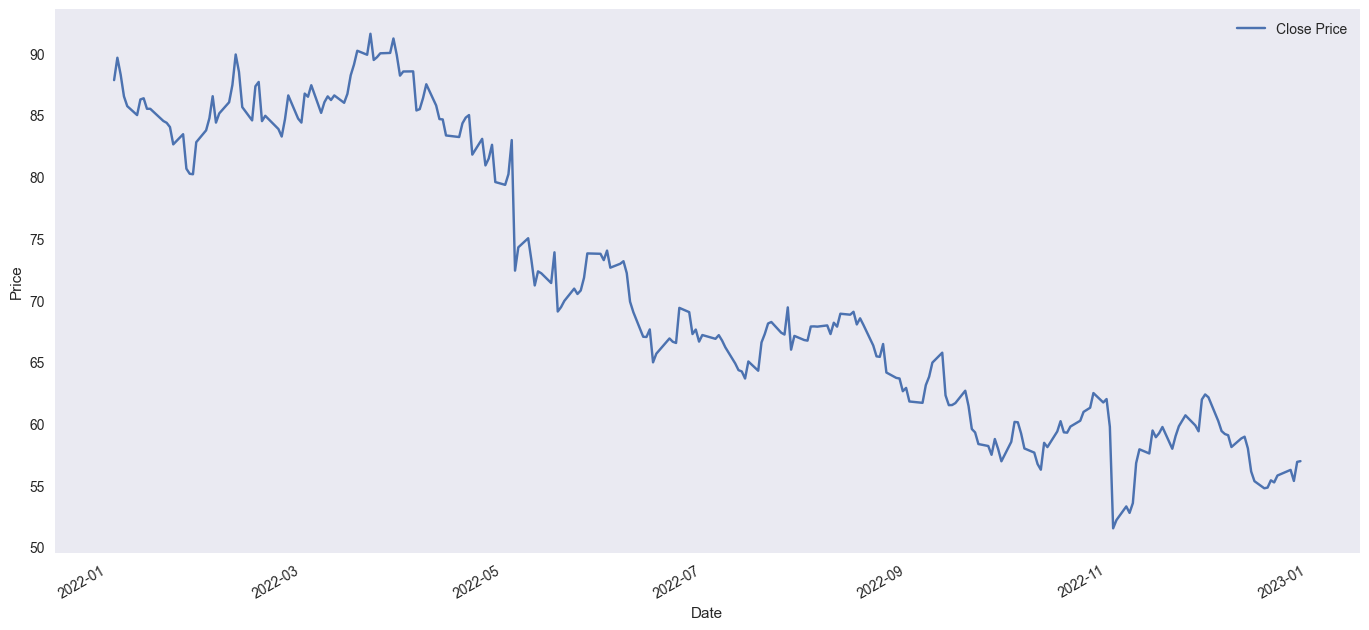

In [5]:
mydata.plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

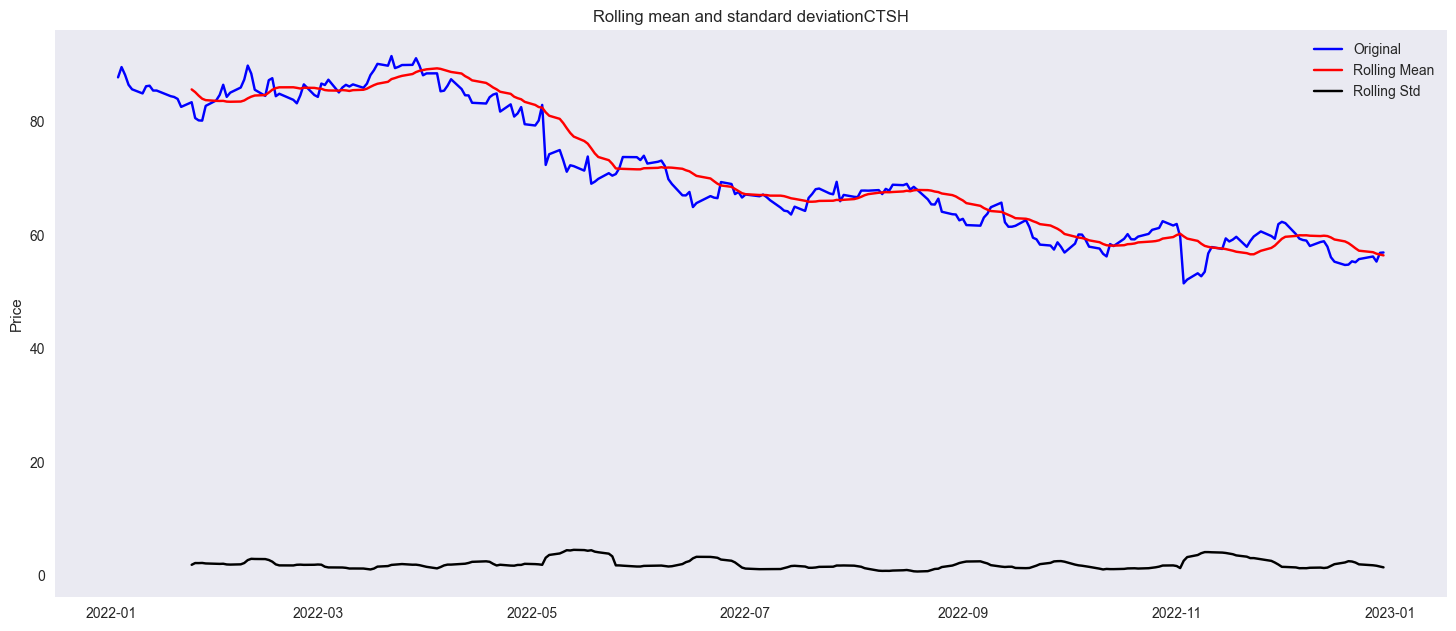

In [6]:
rolling_mean = mydata['Close Price'].rolling(15).mean()
rolling_std = mydata['Close Price'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig = plt.figure(1)

orig = plt.plot(mydata['Close Price'], color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation' + myticker)
plt.grid()
plt.ylabel("Price")
plt.show()

In [7]:
#create 10 days simple moving average column
mydata['SMA30'] = mydata['Close Price'].rolling(window = 30, min_periods =1).mean()

#create 60 days simples moving average column
mydata['SMA90'] = mydata['Close Price'].rolling(window = 90, min_periods =1).mean()

#display first few rows
mydata.head()

,Close Price,SMA30,SMA90
Date,,,
2022-01-03,87.823898,87.823898,87.823898
2022-01-04,89.637840,88.730869,88.730869
2022-01-05,88.265137,88.575625,88.575625
2022-01-06,86.510040,88.059229,88.059229
2022-01-07,85.715813,87.590546,87.590546


In [8]:
mydata['Signal'] = 0.0
mydata['Signal'] = np.where(mydata['SMA30'] > mydata['SMA90'], 1.0, 0.0)

mydata['Position'] = mydata['Signal'].diff()

#display first few rows
mydata.head()

,Close Price,SMA30,SMA90,Signal,Position
Date,,,,,
2022-01-03,87.823898,87.823898,87.823898,0.0,NaN
2022-01-04,89.637840,88.730869,88.730869,0.0,0.0
2022-01-05,88.265137,88.575625,88.575625,0.0,0.0
2022-01-06,86.510040,88.059229,88.059229,0.0,0.0
2022-01-07,85.715813,87.590546,87.590546,0.0,0.0


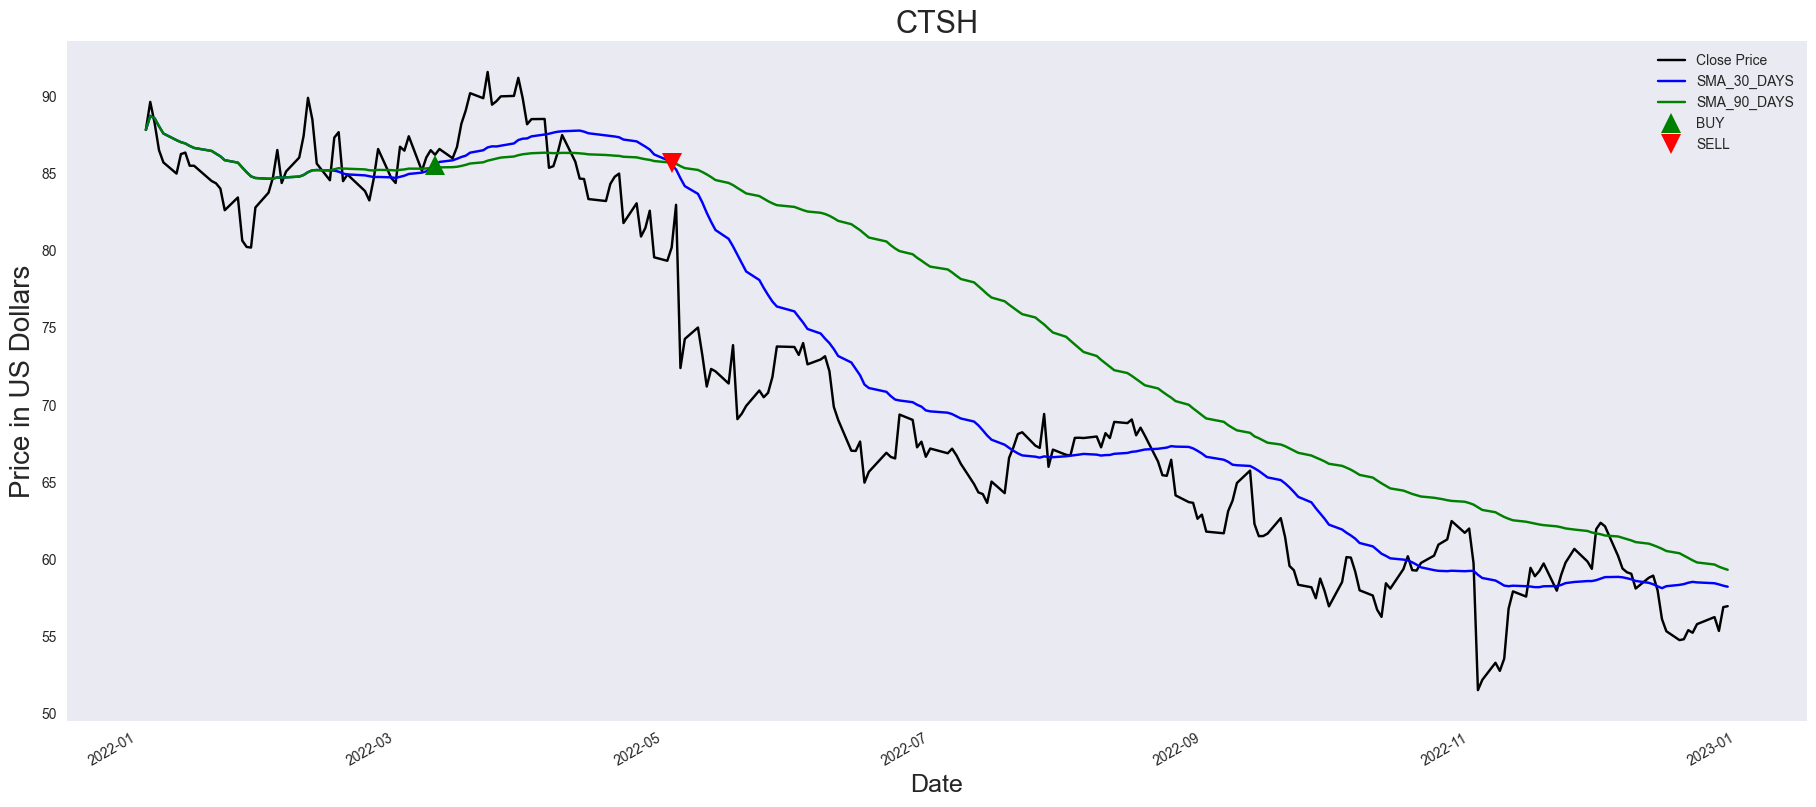

In [9]:
plt.figure(figsize=(20,10))

#Plotiing close price, short , long-term moving average
mydata['Close Price'].plot(color='k',label='Close Price')
mydata['SMA30'].plot(color='b',label='SMA_30_DAYS')
mydata['SMA90'].plot(color='g',label='SMA_90_DAYS')

#PLOTIING BUY SIGNALS 

plt.plot(mydata[mydata['Position']== 1].index,
         mydata['SMA30'][mydata['Position']== 1],
         '^',markersize=15,color='g',label='BUY')

#PLOTIING SELL SIGNALS 
plt.plot(mydata[mydata['Position']== -1].index,
         mydata['SMA90'][mydata['Position']== -1],
         'v',markersize=15,color='r',label='SELL')
plt.ylabel("Price in US Dollars",fontsize=20)
plt.xlabel('Date',fontsize=18)
plt.title(myticker,fontsize=22)
plt.legend()
plt.grid()
plt.show()

In [10]:
df_position = mydata[(mydata['Position'] == 1) | (mydata['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   SMA30 |   SMA90 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2022-03-10 00:00:00 |       86.2115 | 85.5327 | 85.3694 |        1 | Buy        |
| 2022-05-03 00:00:00 |       80.2024 | 85.5466 | 85.6599 |        0 | Sell       |
+---------------------+---------------+---------+---------+----------+------------+


In [11]:
myticker = 'CTSH'
mydata = pd.DataFrame()
mydata[myticker] = yf.download(myticker, start = "2022-01-01", end="2022-12-31")['Adj Close']
mydata.columns = {'Close Price'}


[*********************100%***********************]  1 of 1 completed


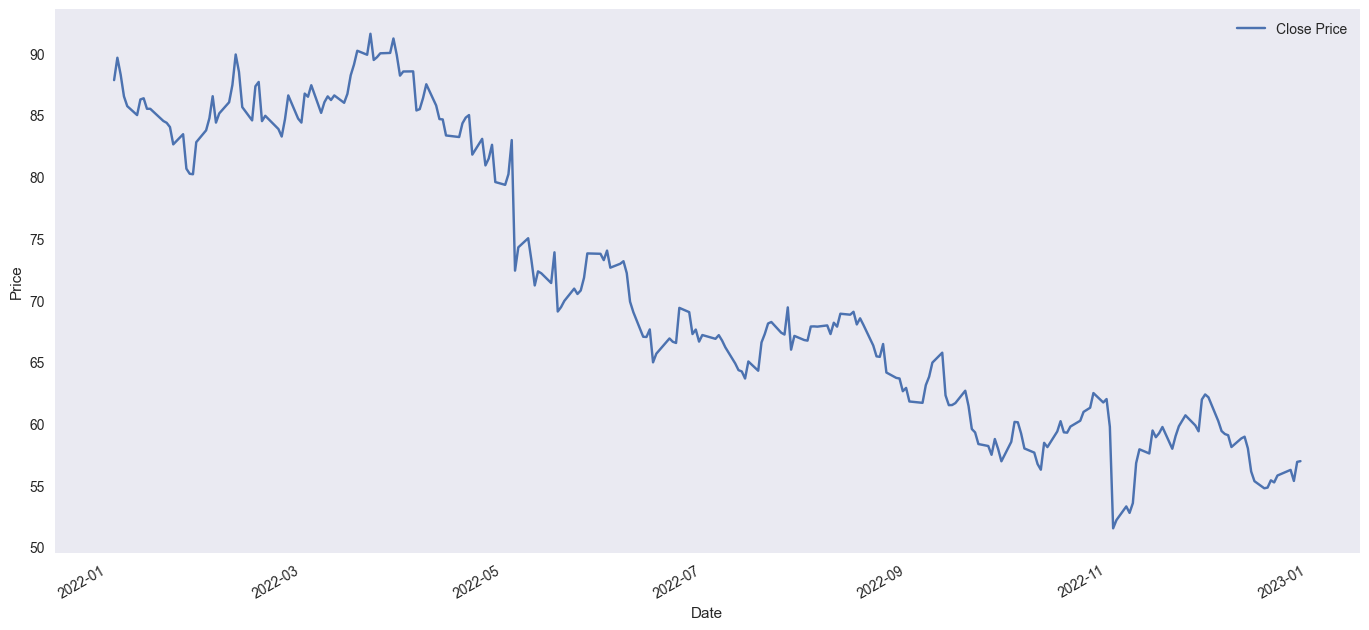

In [12]:
mydata.plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

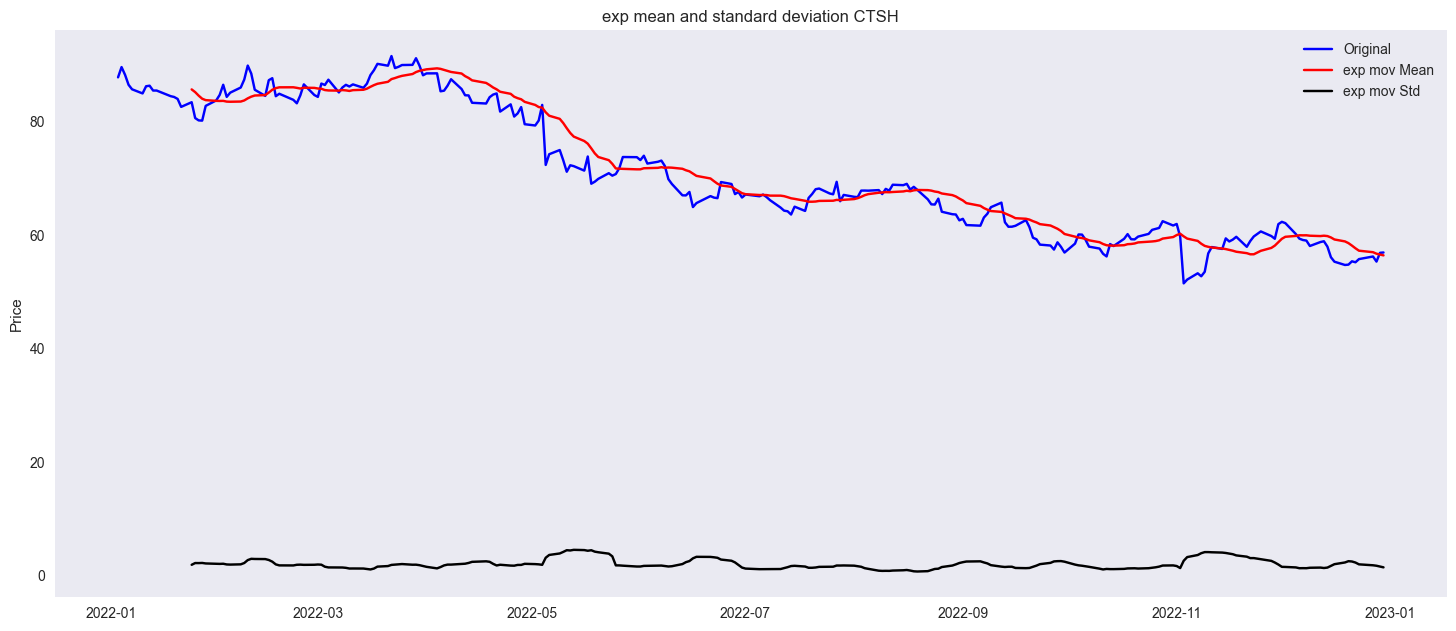

In [13]:
exp_mean = mydata['Close Price'].ewm(15).mean()
exp_std = mydata['Close Price'].ewm(15).std()

plt.figure(figsize = (16, 7))
fig = plt.figure(1)

orig = plt.plot(mydata['Close Price'], color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='exp mov Mean')
std = plt.plot(rolling_std, color='black', label='exp mov Std')
plt.legend(loc='best')
plt.title('exp mean and standard deviation ' + myticker)
plt.grid()
plt.ylabel("Price")
plt.show()

In [14]:
#create 10 days simple moving average column
mydata['EMA30'] = mydata['Close Price'].ewm(span = 30, min_periods =1).mean()

#create 60 days simples moving average column
mydata['EMA90'] = mydata['Close Price'].ewm(span = 90, min_periods =1).mean()

#display first few rows
mydata.head()

,Close Price,EMA30,EMA90
Date,,,
2022-01-03,87.823906,87.823906,87.823906
2022-01-04,89.637833,88.761101,88.740947
2022-01-05,88.265129,88.584637,88.578803
2022-01-06,86.510025,88.013006,88.044243
2022-01-07,85.715820,87.490341,87.557634


In [15]:
mydata['Signal'] = 0.0
mydata['Signal'] = np.where(mydata['EMA30'] > mydata['EMA90'], 1.0, 0.0)

mydata['Position'] = mydata['Signal'].diff()

#display first few rows
mydata.head()

,Close Price,EMA30,EMA90,Signal,Position
Date,,,,,
2022-01-03,87.823906,87.823906,87.823906,0.0,NaN
2022-01-04,89.637833,88.761101,88.740947,1.0,1.0
2022-01-05,88.265129,88.584637,88.578803,1.0,0.0
2022-01-06,86.510025,88.013006,88.044243,0.0,-1.0
2022-01-07,85.715820,87.490341,87.557634,0.0,0.0


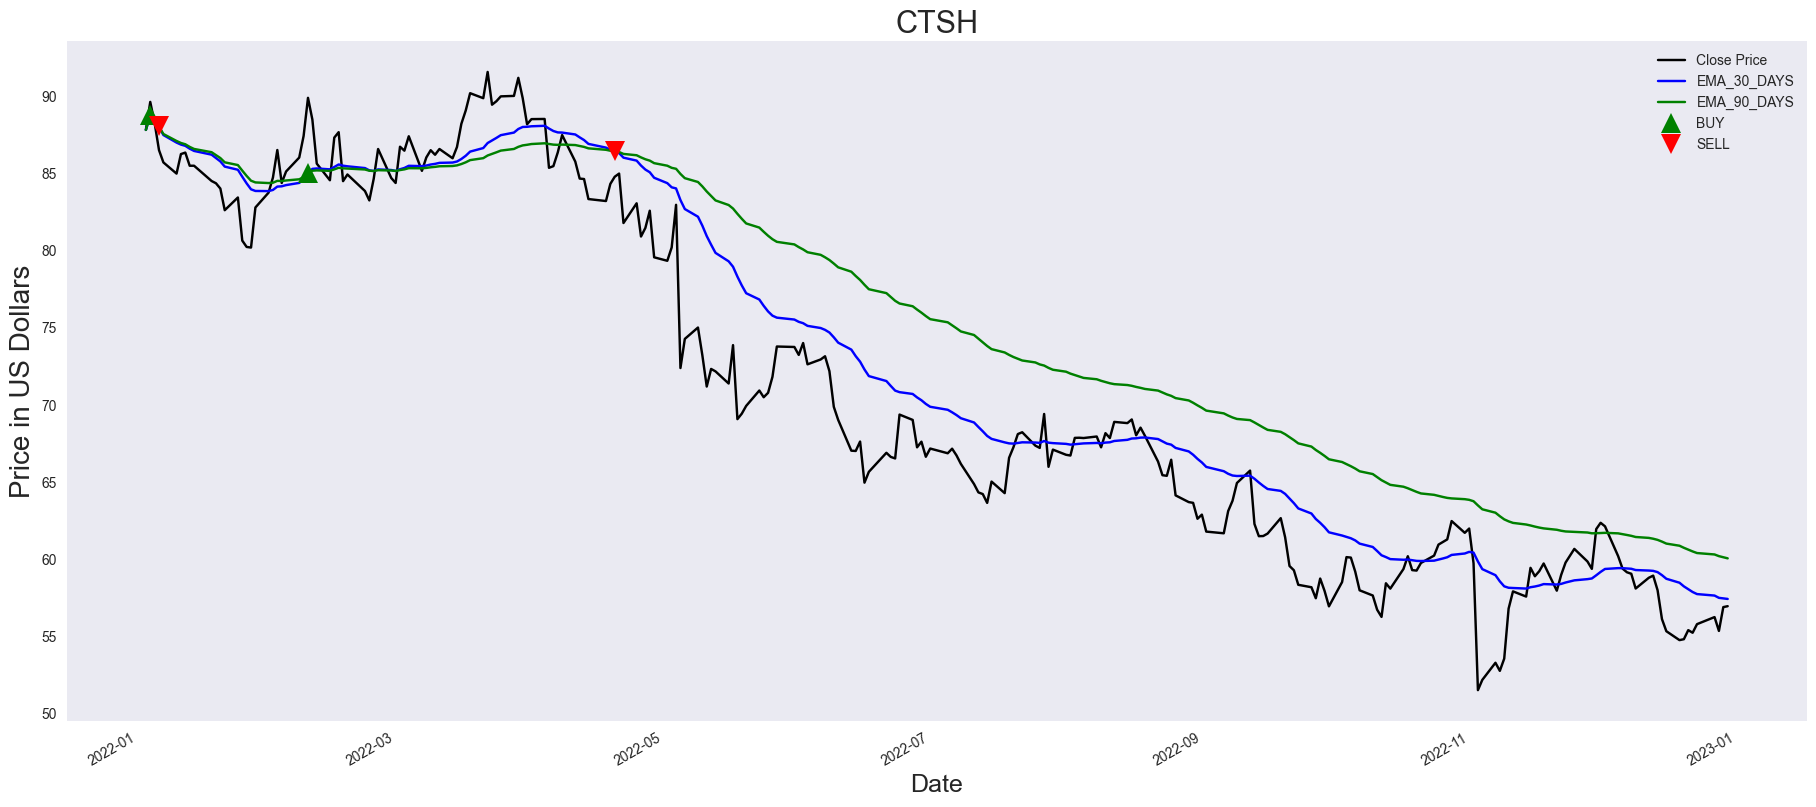

In [16]:
plt.figure(figsize=(20,10))

#Plotiing close price, short , long-term moving average
mydata['Close Price'].plot(color='k',label='Close Price')
mydata['EMA30'].plot(color='b',label='EMA_30_DAYS')
mydata['EMA90'].plot(color='g',label='EMA_90_DAYS')

#PLOTIING BUY SIGNALS 

plt.plot(mydata[mydata['Position']== 1].index,
         mydata['EMA30'][mydata['Position']== 1],
         '^',markersize=15,color='g',label='BUY')

#PLOTIING SELL SIGNALS 
plt.plot(mydata[mydata['Position']== -1].index,
         mydata['EMA90'][mydata['Position']== -1],
         'v',markersize=15,color='r',label='SELL')
plt.ylabel("Price in US Dollars",fontsize=20)
plt.xlabel('Date',fontsize=18)
plt.title(myticker,fontsize=22)
plt.legend()
plt.grid()
plt.show()

In [17]:
df_position = mydata[(mydata['Position'] == 1) | (mydata['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   EMA30 |   EMA90 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2022-01-04 00:00:00 |       89.6378 | 88.7611 | 88.7409 |        1 | Buy        |
| 2022-01-06 00:00:00 |       86.51   | 88.013  | 88.0442 |        0 | Sell       |
| 2022-02-09 00:00:00 |       89.9026 | 85.0331 | 85.0121 |        1 | Buy        |
| 2022-04-20 00:00:00 |       84.7854 | 86.4097 | 86.428  |        0 | Sell       |
+---------------------+---------------+---------+---------+----------+------------+


### Using Facebook Prophet, generate a prediction of the stock price. Use January 1, 2022 through December 31, 2022 to create the model, then create the projection for January 1, 2023 through December 31, 2023.

In [18]:
myticker='CTSH'
df=pd.DataFrame()
df[myticker]=yf.download(myticker,start="2022-01-01",end="2022-12-31")['Adj Close']
df.columns = {'Close'}
df.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2022-01-03,87.823906
2022-01-04,89.637833
2022-01-05,88.265129
2022-01-06,86.510025
2022-01-07,85.715828


In [19]:
df=df.reset_index()
df[['ds','y']]=df[['Date','Close']]
model = Prophet()
prophet_df=df.drop(['Date','Close'],axis=1)
prophet_df

,ds,y
0,2022-01-03,87.823906
1,2022-01-04,89.637833
2,2022-01-05,88.265129
3,2022-01-06,86.510025
4,2022-01-07,85.715828
...,...,...
246,2022-12-23,55.777996
247,2022-12-27,56.236008
248,2022-12-28,55.339897
249,2022-12-29,56.883202


Text(0.5, 0, 'Date')

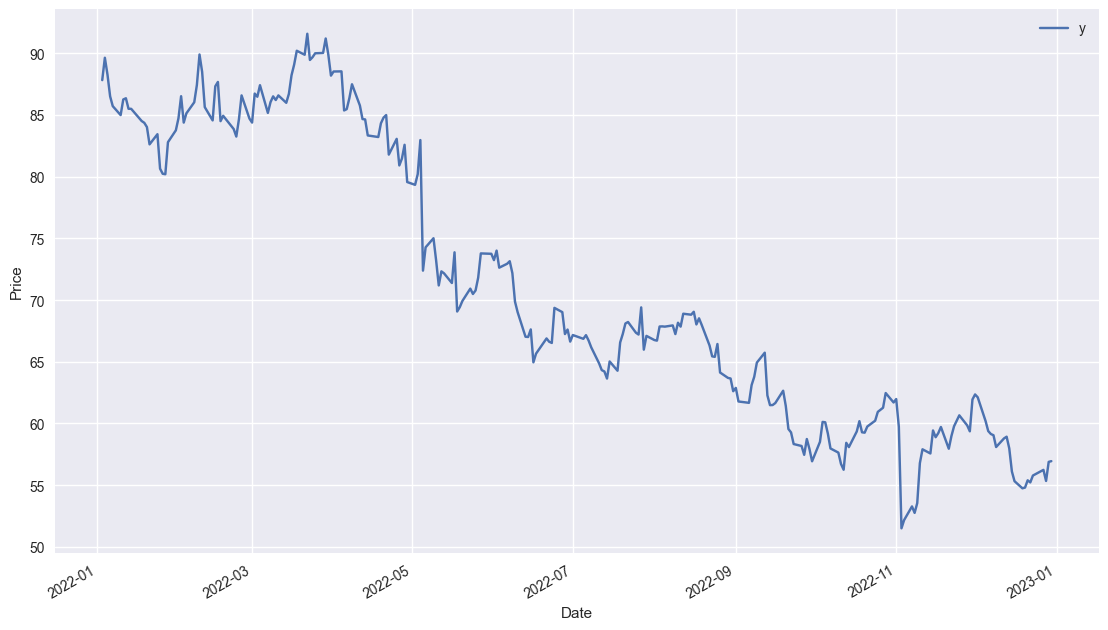

In [20]:
ax=prophet_df.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

In [21]:
model.fit(prophet_df)

14:36:35 - cmdstanpy - INFO - Chain [1] start processing
14:36:35 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future=model.make_future_dataframe(periods=365)

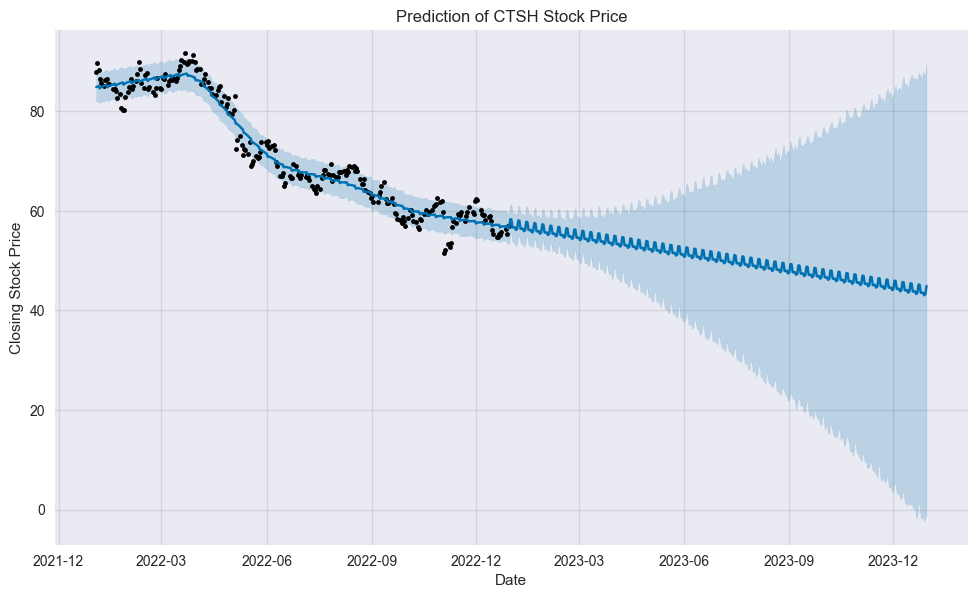

,ds,yhat,yhat_lower,yhat_upper
611,2023-12-26,43.493793,-1.591910,86.931413
612,2023-12-27,43.560816,-1.683789,87.779501
613,2023-12-28,43.026697,-2.354646,87.482300
614,2023-12-29,43.202605,-1.652920,87.016979
615,2023-12-30,44.915143,-1.222497,89.681495


In [23]:
predictions = model.predict(future)
model.plot(predictions)
plt.title("Prediction of CTSH Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

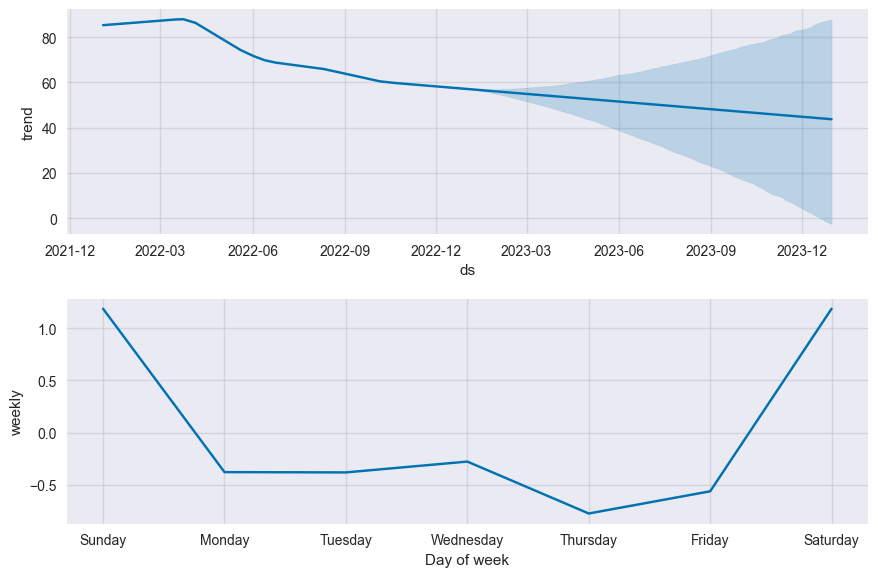

In [24]:
model.plot_components(predictions)
plt.show()

Facebook Prophet is a time series forecasting library developed by Facebook's data science team. It can be used to forecast future trends and patterns in time series data, including stock prices. Here's how it can help in stock prediction:

Handling Seasonality: Prophet can identify and model the seasonality of stock prices, which is essential for accurate forecasting. This includes weekly, monthly, and yearly cycles, as well as any other patterns that are present in the data.

Flexibility: Prophet is designed to handle missing data, outliers, and abrupt changes in the trend, which are common in financial data. It also allows users to customize the model parameters and select the appropriate forecasting horizon.

Visualization: Prophet provides built-in visualization tools to help users explore and understand their data. These visualizations can be used to identify patterns and anomalies that might affect the accuracy of the forecast.

Interpretability: Prophet provides interpretable results, meaning that users can understand how the model arrived at its predictions. This can help users identify the most important factors driving the stock price and make informed investment decisions.

It's important to note that while Prophet can be a useful tool for stock prediction, it's not a guaranteed solution for predicting stock prices accurately. Many factors can affect stock prices, including macroeconomic factors, company-specific news, and investor sentiment. As such, Prophet should be used in conjunction with other tools and information when making investment decisions.